In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# Data Checks to perform

1. Missing values
2. Duplicates
3. Data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical columns

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#Interpretation: No missing values

In [8]:
#another way to perform the above operation
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#Interpretation: 
# Three numerical data and five string, means object type data

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
#Insights:
# Mean of all columns ranges from 66 to 69, which are comparable to each other
#Minimum value of maths is zero, means at least one of the student has got zero score
# Maximum score for all the subjects is 100, means anyone of the students has got full marks

In [13]:
#segregate numerical and categorical data

#list comprehension for the numerical data
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

#List comprehension for categorical data
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [14]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [15]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
#Check the unique values of the data set
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
#calculate the average of the score
df['total_score'] = df.math_score + df.reading_score + df.writing_score

In [21]:
df['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [22]:
#another way of totaling
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [23]:
df['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [24]:
#calculate the average of the score
df['average'] = df['total_score'] / 3

In [25]:
df['average']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average, Length: 1000, dtype: float64

In [26]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='average', ylabel='Count'>

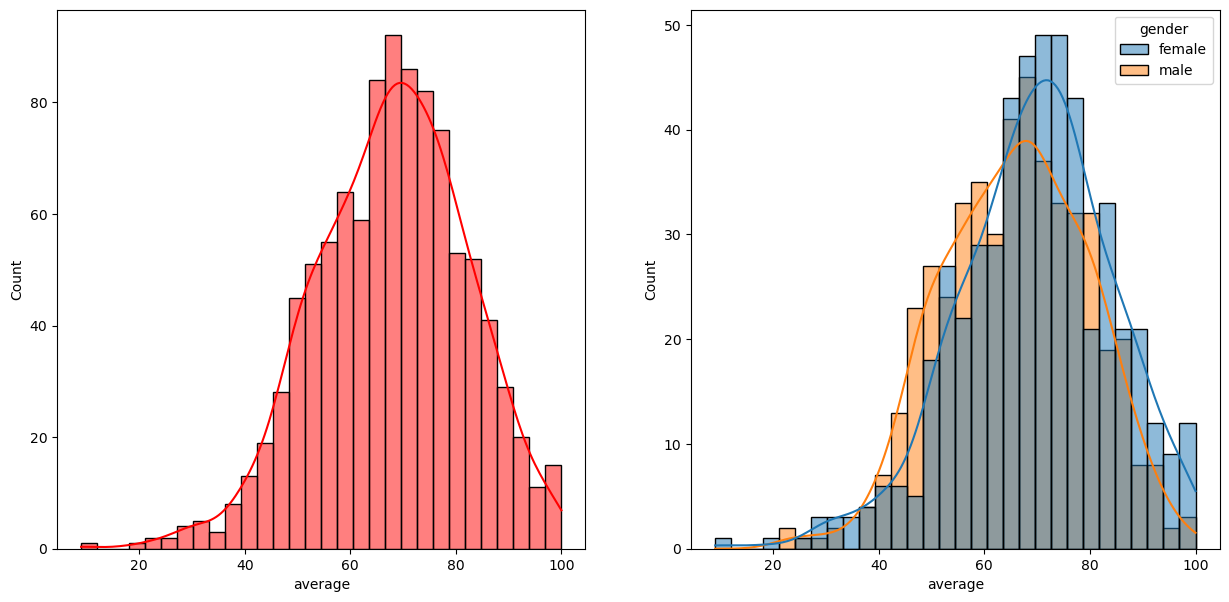

In [28]:
#Explore the visualization
fig, axis =  plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x = 'average', bins=30, kde=True, color='r')

plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')

# INSIGHTS:
Female students tend to perform better than male students

In [33]:
df[df['gender']=='female']

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
...,...,...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,208,69.333333
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [36]:
df[df['gender']=='male'].sum()

gender                         malemalemalemalemalemalemalemalemalemalemalema...
race_ethnicity                 group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...
parental_level_of_education    associate's degreesome collegesome collegehigh...
lunch                          free/reducedstandardfree/reducedfree/reducedst...
test_preparation_course        nonenonenonecompletednonenonecompletednonecomp...
math_score                                                                 33127
reading_score                                                              31558
writing_score                                                              30516
total_score                                                                95201
average                                                             31733.666667
dtype: object

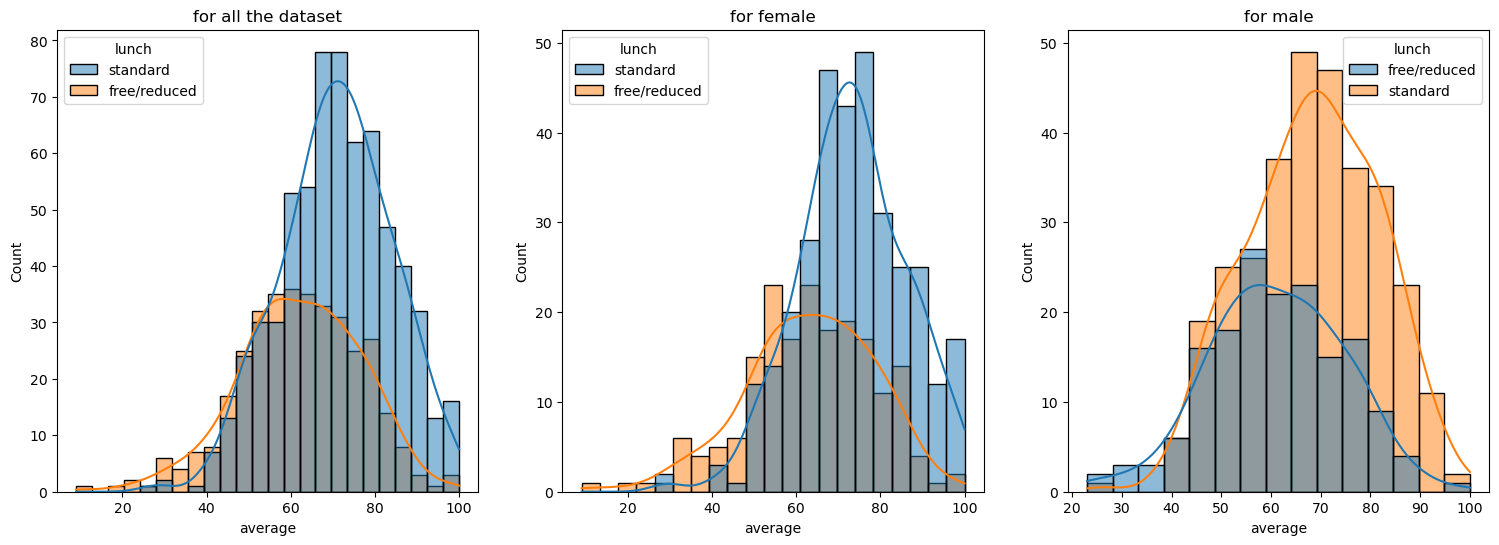

In [48]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title('for all the dataset')
sns.histplot(data=df,x='average', kde=True, hue='lunch')

plt.subplot(142)
plt.title('for female')
sns.histplot(data=df[df['gender']=='female'],x='average', kde=True, hue='lunch')

plt.subplot(143)
plt.title('for male')
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')
plt.show()

# Insights:
1. Standard lunch helps students perform well in exams 
2. Standard lunch helps perform well in exams, be it a male or female

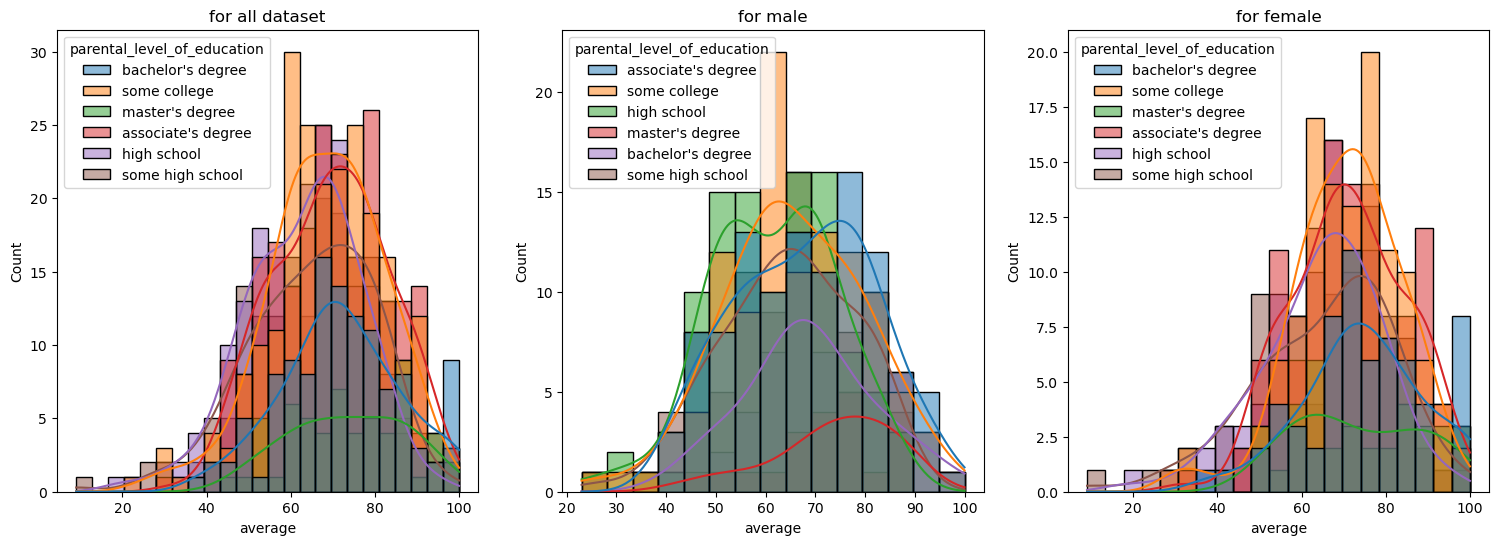

In [59]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
plt.title('for all dataset')
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

plt.subplot(142)
plt.title('for male')
ax = sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental_level_of_education')

plt.subplot(143)
plt.title('for female')
ax = sns.histplot(data=df[df['gender']=='female'],x='average', kde=True, hue='parental_level_of_education')
plt.show()

# INSIGHTS:
1. In general, parent's education doesn't help student perform well in exam.
2. The second plot shows parent's whose education is of associate degre or master's degree their male child tend to perform well in exam.
3. The third plot shows that we can see there is no effect of parents education on female students.

<Axes: >

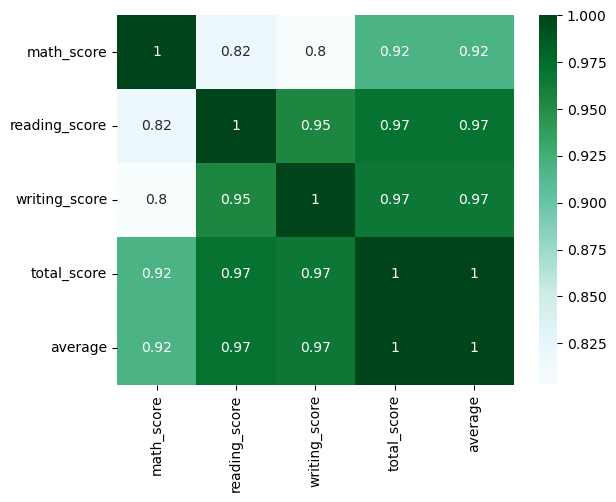

In [65]:
# correlation
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='BuGn')

# The values of cmap can be as follow:
viridis, cool, coolwarm, cubehelix,BuGn,RdYIBu, husl